In [2]:
#Importing all needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the data into the data frame.
df = pd.read_csv("new_train.csv")

In [4]:
#to find the shape of the data
df.shape

(59598, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [6]:
# Step 2: Data Cleaning

# Check for missing values
df.isnull().sum()  # Counts of null values in each column

# Handle missing values if any (Example: filling or dropping)
# Here we choose to drop rows with any missing values (adjust as needed)
df.dropna(inplace=True)

In [7]:
# Step 3: Data Type Conversion (if necessary)

# Example: Converting categorical columns to 'category' dtype to optimize memory
categorical_columns = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
                       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
                       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
                       'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
for col in categorical_columns:
    df[col] = df[col].astype('category')



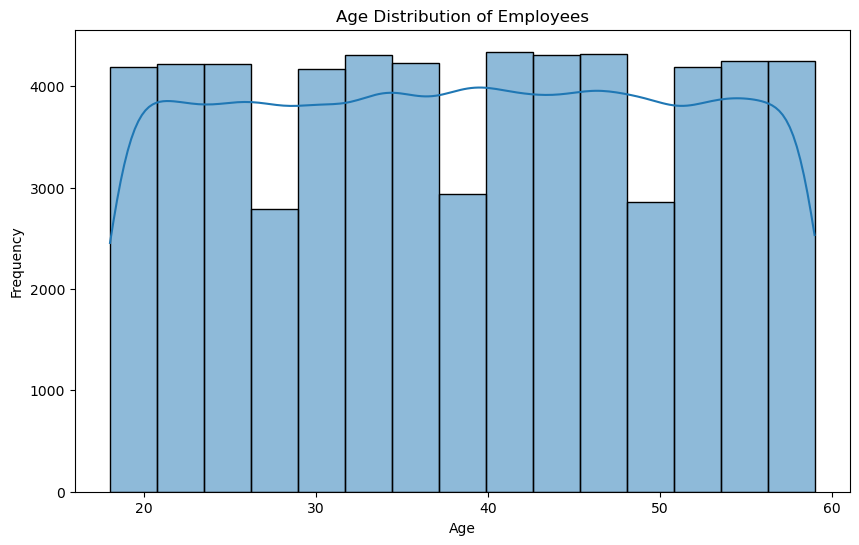

In [8]:
# Step 4: EDA - Initial Analysis and Visualizations

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



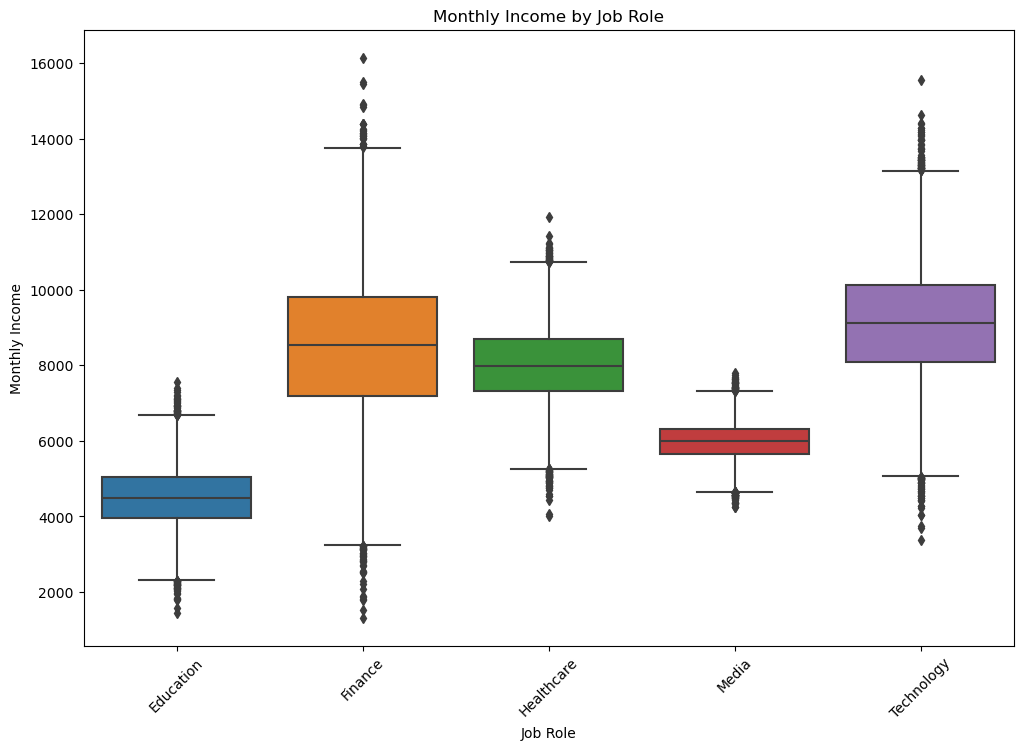

In [9]:
# 2. Monthly Income by Job Role
plt.figure(figsize=(12, 8))
sns.boxplot(x='Job Role', y='Monthly Income', data=df)
plt.xticks(rotation=45)
plt.title('Monthly Income by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.show()



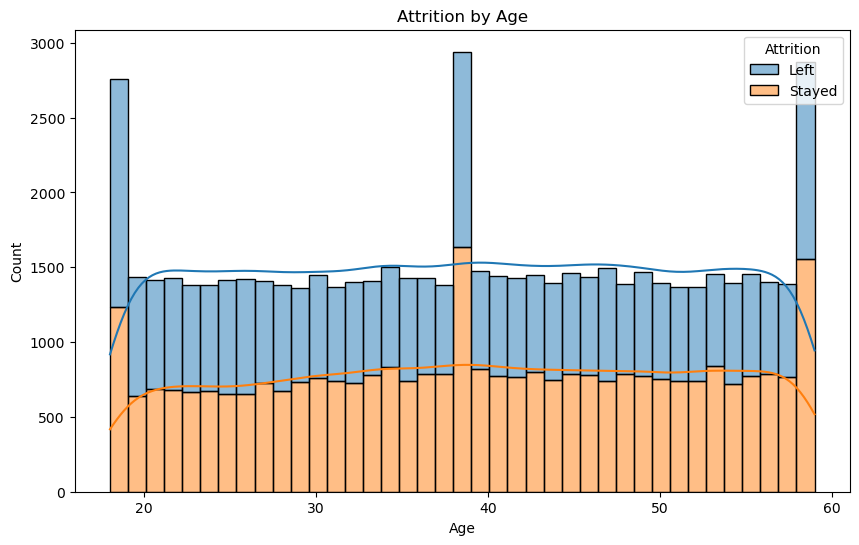

In [10]:
# 3. Attrition by Age and Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple="stack", kde=True)
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



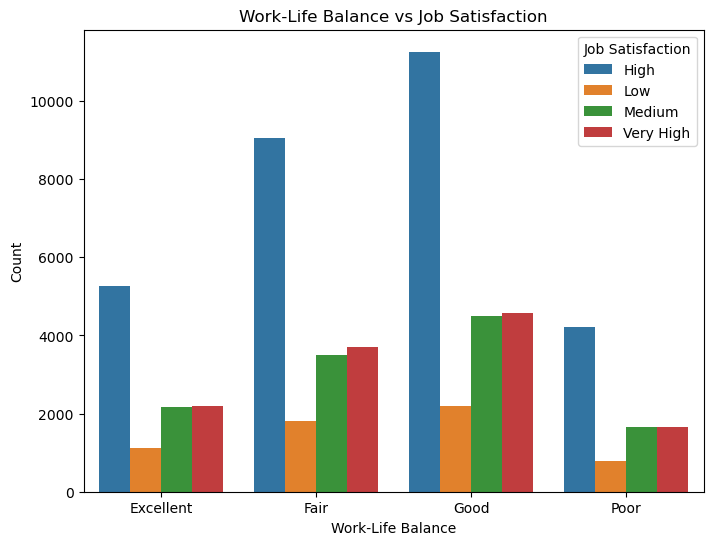

In [11]:
# 4. Work-Life Balance vs Job Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x='Work-Life Balance', hue='Job Satisfaction', data=df)
plt.title('Work-Life Balance vs Job Satisfaction')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction')
plt.show()



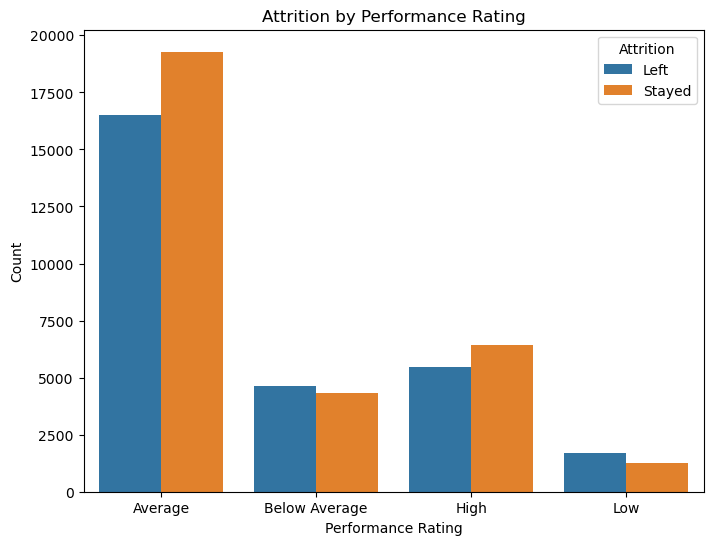

In [12]:
# 5. Attrition by Performance Rating
plt.figure(figsize=(8, 6))
sns.countplot(x='Performance Rating', hue='Attrition', data=df)
plt.title('Attrition by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()



In [13]:
# Step 5: Summary Statistics and Insights

# Calculate average monthly income for each job role
avg_income_by_role = df.groupby('Job Role')['Monthly Income'].mean()
print("Average Monthly Income by Job Role:\n", avg_income_by_role)

# Attrition rate
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("Attrition Rate:\n", attrition_rate)

# Average years at company by job role
avg_years_by_role = df.groupby('Job Role')['Years at Company'].mean()
print("Average Years at Company by Job Role:\n", avg_years_by_role)



Average Monthly Income by Job Role:
 Job Role
Education     4498.584948
Finance       8497.713775
Healthcare    8001.337267
Media         5991.803426
Technology    9108.653511
Name: Monthly Income, dtype: float64
Attrition Rate:
 Attrition
Stayed    52.451425
Left      47.548575
Name: proportion, dtype: float64
Average Years at Company by Job Role:
 Job Role
Education     15.771417
Finance       15.769112
Healthcare    15.782290
Media         15.779403
Technology    15.690849
Name: Years at Company, dtype: float64


In [14]:
# Step 6: Additional Insights

# 1. Average Monthly Income by Job Role
# Calculate the average monthly income for each job role to identify income distribution across roles
avg_income_by_role = df.groupby('Job Role')['Monthly Income'].mean()
print("Average Monthly Income by Job Role:\n", avg_income_by_role)

# 2. Attrition Rate
# Calculate the overall attrition rate (percentage of employees who left vs. stayed)
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("\nAttrition Rate (%):\n", attrition_rate)

# 3. Average Years at Company by Job Role
# Compute the average tenure in years at the company for each job role
avg_years_by_role = df.groupby('Job Role')['Years at Company'].mean()
print("\nAverage Years at Company by Job Role:\n", avg_years_by_role)

# 4. Average Work-Life Balance Rating by Job Role
# Calculate the average work-life balance score per job role, which could indicate job satisfaction
work_life_balance_by_role = df.groupby('Job Role')['Work-Life Balance'].apply(lambda x: x.cat.codes.mean())
print("\nAverage Work-Life Balance Rating by Job Role (0=Poor, 3=Excellent):\n", work_life_balance_by_role)

# 5. Job Satisfaction and Attrition Analysis
# Analyze if lower job satisfaction is associated with higher attrition
job_satisfaction_attrition = df.groupby(['Job Satisfaction', 'Attrition']).size().unstack().fillna(0)
print("\nJob Satisfaction vs Attrition:\n", job_satisfaction_attrition)



Average Monthly Income by Job Role:
 Job Role
Education     4498.584948
Finance       8497.713775
Healthcare    8001.337267
Media         5991.803426
Technology    9108.653511
Name: Monthly Income, dtype: float64

Attrition Rate (%):
 Attrition
Stayed    52.451425
Left      47.548575
Name: proportion, dtype: float64

Average Years at Company by Job Role:
 Job Role
Education     15.771417
Finance       15.769112
Healthcare    15.782290
Media         15.779403
Technology    15.690849
Name: Years at Company, dtype: float64

Average Work-Life Balance Rating by Job Role (0=Poor, 3=Excellent):
 Job Role
Education     1.484227
Finance       1.480382
Healthcare    1.471192
Media         1.478588
Technology    1.472883
Name: Work-Life Balance, dtype: float64

Job Satisfaction vs Attrition:
 Attrition          Left  Stayed
Job Satisfaction               
High              13489   16290
Low                3088    2803
Medium             5356    6461
Very High          6405    5706


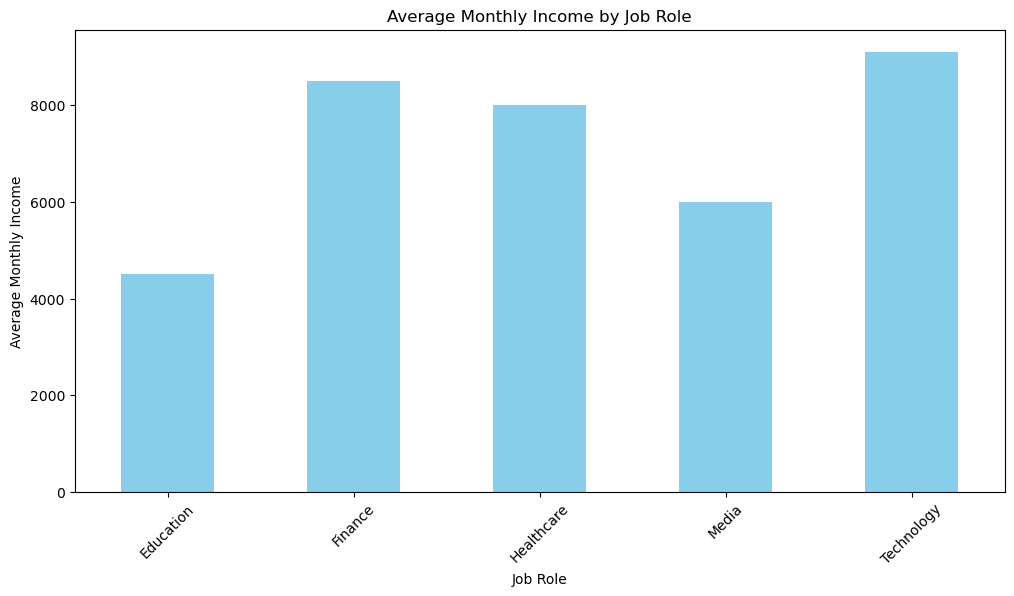

In [15]:
# Visualizations for Additional Insights

# Plot 1: Average Monthly Income by Job Role
plt.figure(figsize=(12, 6))
avg_income_by_role.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Income by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45)
plt.show()



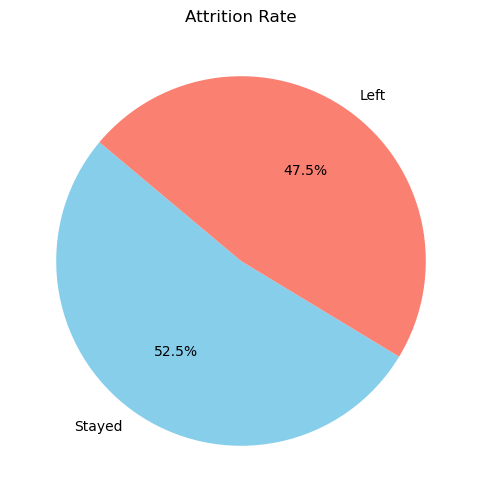

In [16]:
# Plot 2: Attrition Rate
plt.figure(figsize=(6, 6))
attrition_rate.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Attrition Rate')
plt.ylabel('')  # Remove default y-axis label
plt.show()



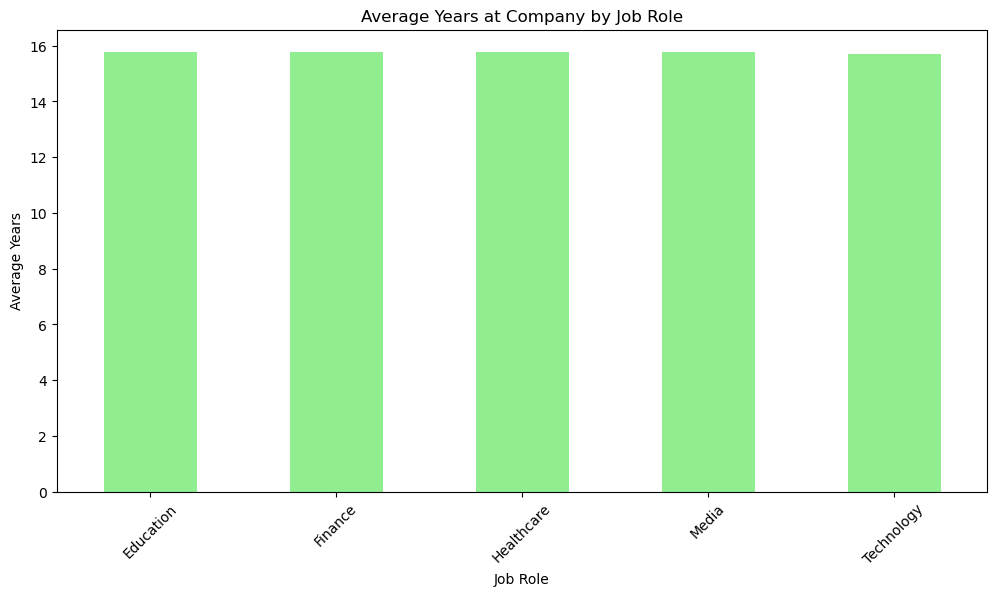

In [17]:
# Plot 3: Average Years at Company by Job Role
plt.figure(figsize=(12, 6))
avg_years_by_role.plot(kind='bar', color='lightgreen')
plt.title('Average Years at Company by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Years')
plt.xticks(rotation=45)
plt.show()



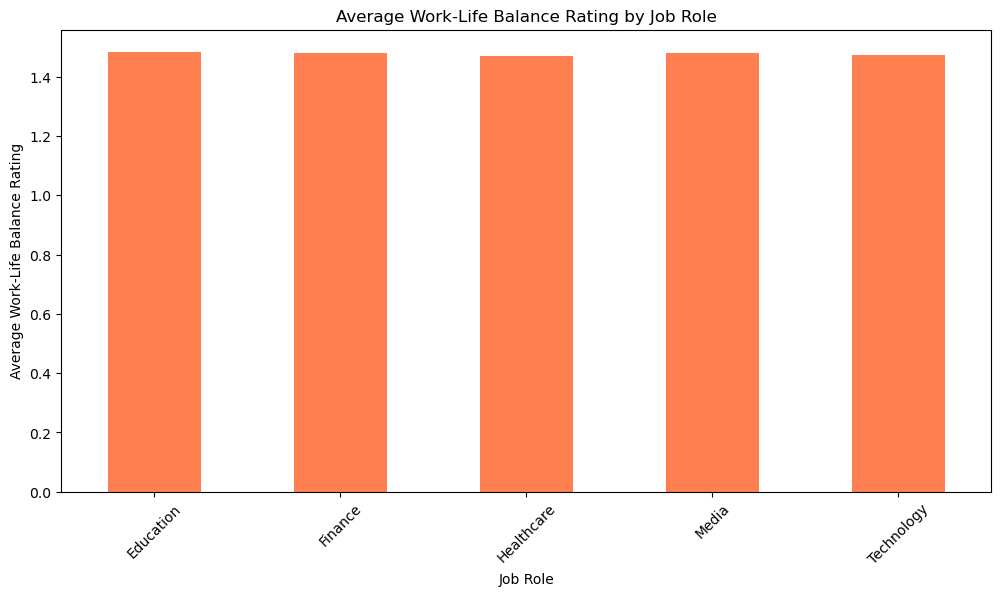

In [18]:
# Plot 4: Average Work-Life Balance Rating by Job Role
plt.figure(figsize=(12, 6))
work_life_balance_by_role.plot(kind='bar', color='coral')
plt.title('Average Work-Life Balance Rating by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Work-Life Balance Rating')
plt.xticks(rotation=45)
plt.show()



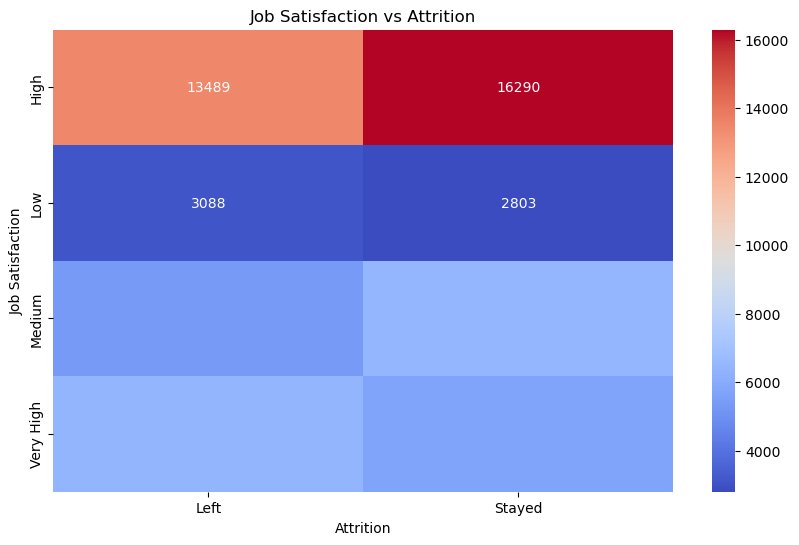

In [19]:
# Plot 5: Job Satisfaction vs Attrition
plt.figure(figsize=(10, 6))
sns.heatmap(job_satisfaction_attrition, annot=True, cmap='coolwarm', fmt='g')
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()


# Feature engineering

In [21]:
# Importing necessary libraries
import numpy as np

# Step 1: Create a 'Tenure Level' based on 'Years at Company'
# Categorize employees into short, medium, and long tenures
def tenure_level(years):
    if years < 5:
        return 'Short'
    elif 5 <= years < 15:
        return 'Medium'
    else:
        return 'Long'

df['Tenure Level'] = df['Years at Company'].apply(tenure_level)



In [22]:
# Step 2: Create a feature for 'Income Bracket' based on 'Monthly Income'
# Divide income into Low, Medium, and High brackets for comparison
income_quartiles = df['Monthly Income'].quantile([0.33, 0.66])
def income_bracket(income):
    if income <= income_quartiles[0.33]:
        return 'Low'
    elif income <= income_quartiles[0.66]:
        return 'Medium'
    else:
        return 'High'

df['Income Bracket'] = df['Monthly Income'].apply(income_bracket)



In [23]:
# Step 3: Generate 'Commute Category' based on 'Distance from Home'
# Define commute as Short, Medium, or Long based on distance thresholds
def commute_category(distance):
    if distance < 10:
        return 'Short'
    elif 10 <= distance < 30:
        return 'Medium'
    else:
        return 'Long'

df['Commute Category'] = df['Distance from Home'].apply(commute_category)



In [24]:
# Step 4: Work-Life Balance Rating Encoding
# Convert 'Work-Life Balance' to a numerical scale (e.g., Poor=1 to Excellent=4)
work_life_balance_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
df['Work-Life Balance Score'] = df['Work-Life Balance'].map(work_life_balance_map)



In [25]:
# Step 5: Job Satisfaction and Performance Interaction
# Create a feature that combines job satisfaction and performance to see combined effects
satisfaction_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
performance_map = {'Low': 1, 'Average': 2, 'High': 3}

# Convert categorical satisfaction and performance to numerical values
df['Job Satisfaction Score'] = df['Job Satisfaction'].map(satisfaction_map).astype(float)
df['Performance Rating Score'] = df['Performance Rating'].map(performance_map).astype(float)

# Calculate an interaction feature
df['Satisfaction-Performance Interaction'] = df['Job Satisfaction Score'] * df['Performance Rating Score']

# Display the first few rows of the DataFrame to check
df[['Job Satisfaction Score', 'Performance Rating Score', 'Satisfaction-Performance Interaction']].head()


,Job Satisfaction Score,Performance Rating Score,Satisfaction-Performance Interaction
0,2.0,2.0,4.0
1,3.0,1.0,3.0
2,3.0,1.0,3.0
3,3.0,3.0,9.0
4,4.0,2.0,8.0


In [26]:
# Step 6: Family Responsibility Feature
# Determine family responsibility level based on marital status and number of dependents
def family_responsibility(row):
    if row['Marital Status'] == 'Single' and row['Number of Dependents'] == 0:
        return 'Low'
    elif row['Marital Status'] == 'Married' and row['Number of Dependents'] >= 2:
        return 'High'
    else:
        return 'Medium'

df['Family Responsibility'] = df.apply(family_responsibility, axis=1)

In [27]:
# Step 7: Create an 'Overtime Flag'
# Convert Overtime into binary values (1 for 'Yes', 0 for 'No')
df['Overtime Flag'] = df['Overtime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [28]:
# Step 8: Remote Work and Leadership Interaction
# Create a feature to indicate if an employee has remote work and leadership opportunities
df['Remote-Leadership Interaction'] = df.apply(lambda x: 1 if x['Remote Work'] == 'Yes' and x['Leadership Opportunities'] == 'Yes' else 0, axis=1)



In [29]:
# Step 9: Attrition Encoding
# Convert Attrition to a binary value (1 for 'Left', 0 for 'Stayed')
df['Attrition Flag'] = df['Attrition'].apply(lambda x: 1 if x == 'Left' else 0)



In [30]:
# Step 10: Employee Engagement Score (Hypothetical)
# Convert relevant columns to numeric types if not already done
df['Work-Life Balance Score'] = df['Work-Life Balance Score'].astype(float)
df['Job Satisfaction Score'] = df['Job Satisfaction Score'].astype(float)
df['Performance Rating Score'] = df['Performance Rating Score'].astype(float)

# Map Family Responsibility and convert it to numeric
family_responsibility_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Family Responsibility Score'] = df['Family Responsibility'].map(family_responsibility_map).astype(float)

# Calculate the Engagement Score as the sum of various factors
df['Engagement Score'] = (
    df['Work-Life Balance Score'] +
    df['Job Satisfaction Score'] +
    df['Performance Rating Score'] +
    (4 - df['Family Responsibility Score'])  # Higher value for lower family responsibilities
)

# Display the first few rows to check the result
df[['Work-Life Balance Score', 'Job Satisfaction Score', 'Performance Rating Score', 'Family Responsibility Score', 'Engagement Score']].head()


,Work-Life Balance Score,Job Satisfaction Score,Performance Rating Score,Family Responsibility Score,Engagement Score
0,4.0,2.0,2.0,2.0,10.0
1,1.0,3.0,1.0,2.0,7.0
2,3.0,3.0,1.0,3.0,8.0
3,3.0,3.0,3.0,2.0,11.0
4,2.0,4.0,2.0,2.0,10.0


In [31]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Work-Life Balance Score,Job Satisfaction Score,Performance Rating Score,Satisfaction-Performance Interaction,Family Responsibility,Overtime Flag,Remote-Leadership Interaction,Attrition Flag,Family Responsibility Score,Engagement Score
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,4.0,2.0,2.0,4.0,Medium,0,0,0,2.0,10.0
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,1.0,3.0,1.0,3.0,Medium,0,0,0,2.0,7.0
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3.0,3.0,1.0,3.0,High,0,0,0,3.0,8.0
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,3.0,3.0,3.0,9.0,Medium,0,0,0,2.0,11.0
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,2.0,4.0,2.0,8.0,Medium,1,0,0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2.0,3.0,2.0,6.0,Medium,1,0,1,2.0,9.0
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,2.0,3.0,3.0,9.0,Low,0,0,1,1.0,11.0
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2.0,3.0,3.0,9.0,High,1,0,0,3.0,9.0
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,2.0,4.0,2.0,8.0,Low,0,0,1,1.0,11.0


# Logistic Regression

In [33]:
#1. Data Preprocessing:
#Encoding Categorical Variables: Convert categorical features into numerical values using techniques like label encoding or one-hot encoding.
#Feature Scaling: Standardize numerical features for better performance (e.g., StandardScaler from sklearn).

# Label Encoding for binary categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Converts 'Male' to 1, 'Female' to 0

# One-hot encoding for multi-class categorical columns
df = pd.get_dummies(df, columns=['Job Role', 'Marital Status'], drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Monthly Income', 'Years at Company']] = scaler.fit_transform(df[['Age', 'Monthly Income', 'Years at Company']])


In [34]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Fill missing values in numerical columns with the median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [35]:
#2. Feature Selection:
#Choose relevant features based on domain knowledge or exploratory data analysis (EDA) findings.
#use feature importance scores or recursive feature elimination for automated selection.

features = ['Age', 'Gender', 'Monthly Income', 'Years at Company', 'Job Satisfaction', 'Performance Rating']
target = 'Attrition'  # Assuming 1 for "left" and 0 for "stayed"


In [36]:
#3. Splitting the Data:
#Split your data into training and test sets to evaluate model performance.

from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
#4. Model Training:
#Train the logistic regression model using the training data.

from sklearn.linear_model import LogisticRegression
import pandas as pd

# Convert categorical columns to dummy variables
X_train = pd.get_dummies(X_train)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
#5. Model Prediction:
#Use the trained model to make predictions on the test set.

# Apply one-hot encoding to both training and test sets
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align X_test to have the same columns as X_train, filling missing columns with 0
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Fit the model and make predictions
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.564317673378076
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.56      0.58      9362
           1       0.54      0.57      0.55      8518

    accuracy                           0.56     17880
   macro avg       0.56      0.56      0.56     17880
weighted avg       0.57      0.56      0.56     17880



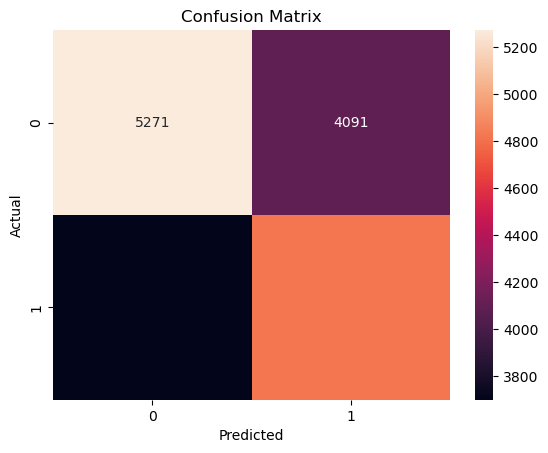

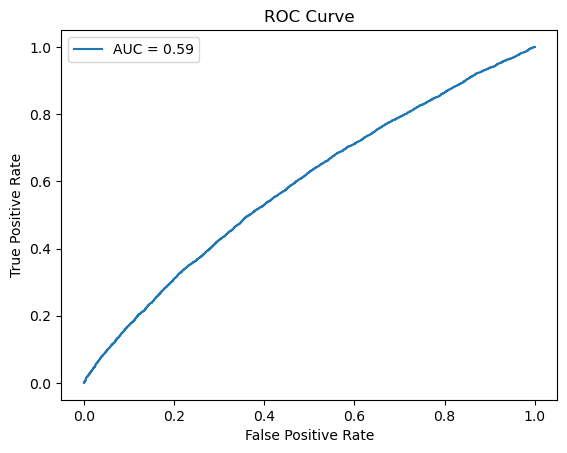

In [39]:
# Required imports
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Convert 'Stayed' to 0 and 'Left' to 1 for y_train and y_test
y_train = y_train.map({'Stayed': 0, 'Left': 1})
y_test = y_test.map({'Stayed': 0, 'Left': 1})

# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Model evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# AUC-ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc_score(y_test, y_prob)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [40]:
#7. Model Interpretation:
#Examine the model coefficients to understand the impact of each feature.

# Ensure 'features' comes from X_train columns
features = X_train.columns

# Check lengths of features and coefficients
print("Number of features:", len(features))
print("Number of coefficints:", len(model.coef_[0]))

# Create DataFrame for interpretation
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})

print(feature_importance)



Number of features: 12
Number of coefficints: 12
                             Feature  Coefficient
0                                Age    -0.035000
1                             Gender    -0.401470
2                     Monthly Income    -0.024383
3                   Years at Company    -0.116320
4              Job Satisfaction_High    -0.102525
5               Job Satisfaction_Low     0.180503
6            Job Satisfaction_Medium    -0.102609
7         Job Satisfaction_Very High     0.211576
8         Performance Rating_Average    -0.102969
9   Performance Rating_Below Average     0.082885
10           Performance Rating_High    -0.128417
11            Performance Rating_Low     0.335447


In [41]:
from sklearn.metrics import accuracy_score

# Assuming the model is already trained and X_test, y_test are defined
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)


Accuracy of the model: 0.564317673378076


# Decision Tree Algorithm for Classification

In [43]:
#1. Import Necessary Libraries for Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [44]:
#2. Define and Train the Model
#Initialize the Decision Tree classifier and train it on X_train and y_train:
tree_model = DecisionTreeClassifier(random_state=42)  # Use a random_state for reproducibility

# Fit the model to the training data
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [45]:
#3. Make Predictions
#Use the trained model to make predictions on the test set (X_test

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)


In [46]:
#4. Evaluate the Model

#Accuracy and Classification Report: Compute accuracy, and print a detailed classification report, which includes precision, recall, and F1-score.
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.5164988814317674
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.53      9362
           1       0.49      0.50      0.50      8518

    accuracy                           0.52     17880
   macro avg       0.52      0.52      0.52     17880
weighted avg       0.52      0.52      0.52     17880



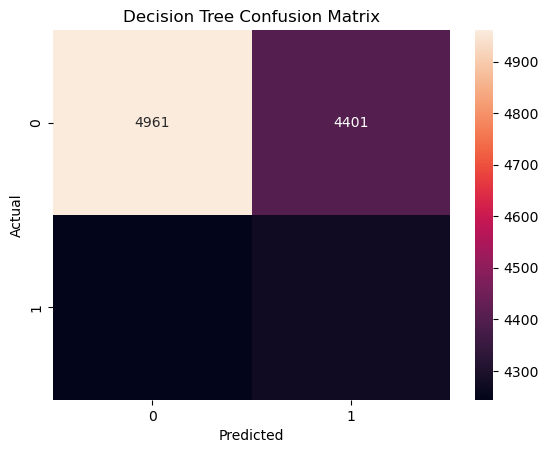

In [47]:
#Confusion Matrix:
#Plot the confusion matrix to visualize the performance in terms of true positives, true negatives, false positives, and false negatives.

# Confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


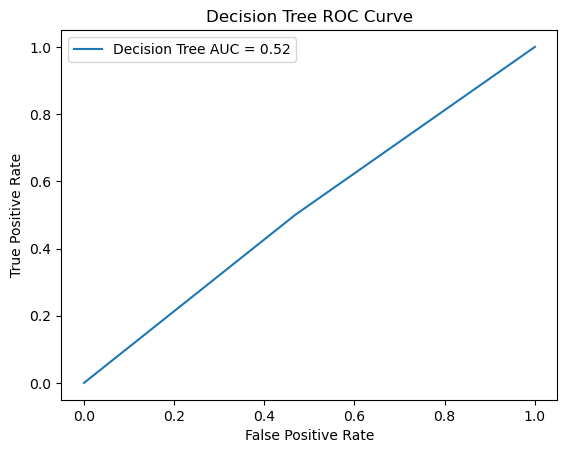

In [48]:
#AUC-ROC Curve: 
#The Decision Tree model can also output class probabilities using .predict_proba(), which allows for plotting an AUC-ROC curve.
# AUC-ROC Curve
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_prob_tree)
plt.plot(fpr_tree, tpr_tree, label="Decision Tree AUC = {:.2f}".format(roc_auc_score(y_test, y_prob_tree)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()


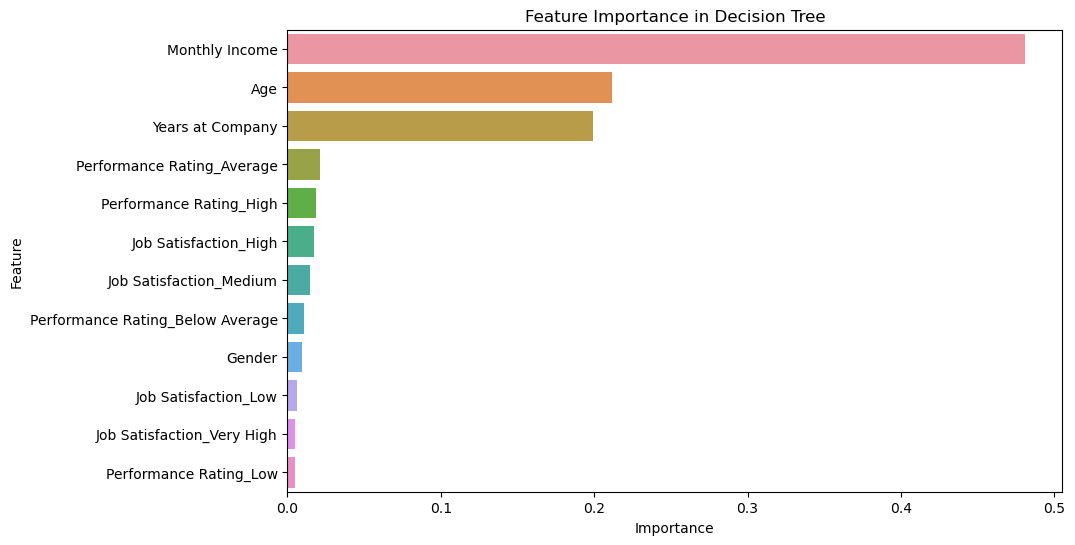

In [49]:
#5. Feature Importance
#Decision Trees can provide insight into which features are most important for making predictions. 
#Plotting feature importance can help interpret the model.
# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Decision Tree')
plt.show()


In [50]:
#1. Calculate Accuracy for Training Data
#Use the trained model to make predictions on the training data (X_train). 
#Then, calculate the accuracy by comparing the predictions with the actual training labels (y_train).
# Predict on training data
y_train_pred = tree_model.predict(X_train)

# Calculate accuracy for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9998561771897023


In [51]:
#2. Calculate Accuracy for Testing Data
# Use the model to make predictions on the testing data (X_test) and calculate the accuracy score by comparing these predictions with y_test.

# Predict on testing data
y_test_pred = tree_model.predict(X_test)

# Calculate accuracy for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.5164988814317674


# K-Nearest Neighbors (KNN) Model

In [53]:
#KNN is a distance-based algorithm, so it's essential to standardize the features. Standardizing scales all features to have a mean of 0 and a standard deviation of 1. This step is crucial as KNN relies on the Euclidean distance between data points, and unscaled data can lead to biased results.
#1. Import Necessary Libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform it
X_test_scaled = scaler.transform(X_test)        # Use the same scaler to transform test data


In [54]:
#2.Choose the Optimal Value of 
#The choice of 𝑘 (number of neighbors) can significantly affect the model’s performance. A common approach is to use cross-validation to identify the optimal 𝑘

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Test different values for k
k_values = range(1, 31)
cv_scores = []  # List to store cross-validation scores for each k

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k with the highest cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")


The optimal number of neighbors is 28


In [55]:
#3.Train the KNN Model:

knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=28)

In [56]:
#4.Make Predictions:
#Use the trained model to make predictions on the test data.
y_pred_knn = knn_model.predict(X_test_scaled)

In [57]:
#5.Model Evaluation:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Model Accuracy: 0.5501118568232662


In [58]:
# Display classification report
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.69      0.62      9362
           1       0.54      0.39      0.45      8518

    accuracy                           0.55     17880
   macro avg       0.55      0.54      0.54     17880
weighted avg       0.55      0.55      0.54     17880



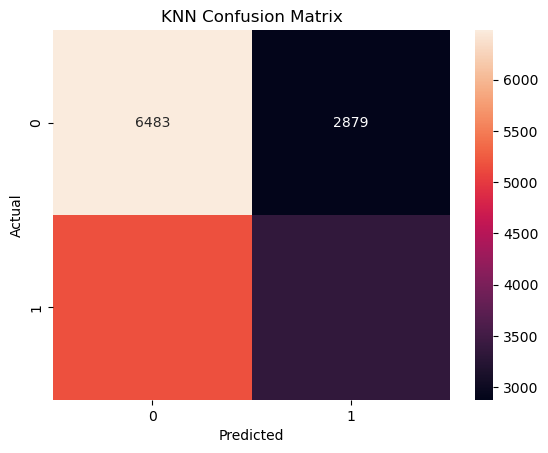

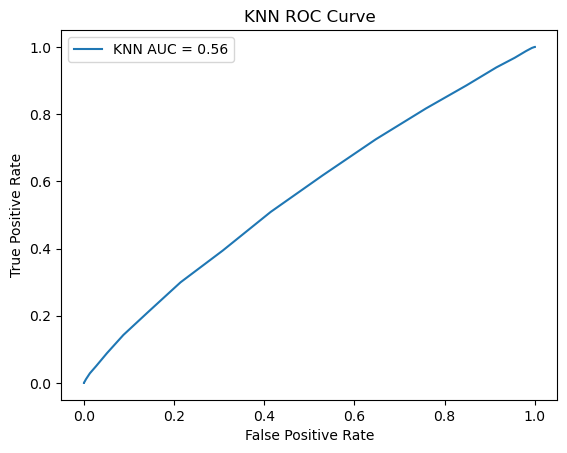

In [59]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# AUC-ROC Curve (for binary classification)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
plt.plot(fpr, tpr, label="KNN AUC = {:.2f}".format(roc_auc_score(y_test, y_prob_knn)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the training data
y_train_pred = knn_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate accuracy on the test data
y_test_pred = knn_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.6003403806510379
Testing Accuracy: 0.5501118568232662


# Naive Bayes classifier

In [62]:
#1. Import Required Libraries for Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
#2. Initialize and Train the Naive Bayes Model
#We'll use Gaussian which is suitable for continuous data, as Naive Bayes assumes that the features follow a Gaussian (normal) distribution

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)


GaussianNB()

In [64]:
#3.Make Predictions

# Make predictions on the test set
y_pred = nb_model.predict(X_test)


In [65]:
#4. Model Evaluation

# Accuracy and Classification Report
#Print the accuracy and the classification report to check the overall performance in terms of precision, recall, and F1-score

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.566834451901566
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.66      0.61      9362
           1       0.55      0.46      0.51      8518

    accuracy                           0.57     17880
   macro avg       0.56      0.56      0.56     17880
weighted avg       0.57      0.57      0.56     17880



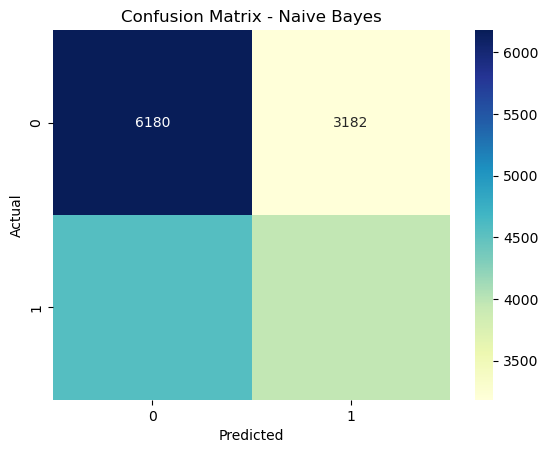

In [66]:
#. Confusion Matrix
#To visualize the confusion matrix, use a heatmap.
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


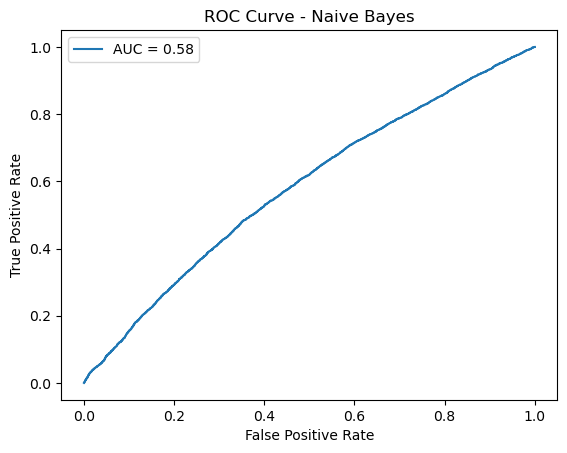

In [67]:
#AUC-ROC Curve
#To evaluate the model’s ability to distinguish between classes, we’ll calculate the AUC-ROC curve and score. Since Naive Bayes provides probabilities for each class, we can use this to plot the ROC curve.

# Get the predicted probabilities for the positive class (class 1)
y_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc_score(y_test, y_prob)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()




In [68]:
# Accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Accuracy on the testing set (using y_pred from previous code)
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.6003403806510379
Testing Accuracy: 0.566834451901566


# Random Forest model

In [70]:
#1. Import Required Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
#2. Define and Train the Model

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [72]:
#3. Make Predictions on Test Data
y_pred_rf = rf_model.predict(X_test)


In [73]:
#4. Model Evaluation
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.540268456375839
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      9362
           1       0.52      0.52      0.52      8518

    accuracy                           0.54     17880
   macro avg       0.54      0.54      0.54     17880
weighted avg       0.54      0.54      0.54     17880



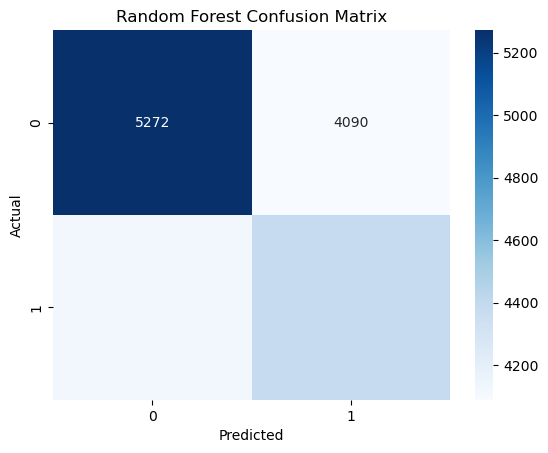

In [74]:
#Confusion Matrix: Display a heatmap for the confusion matrix to get a visual summary of prediction performance.

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


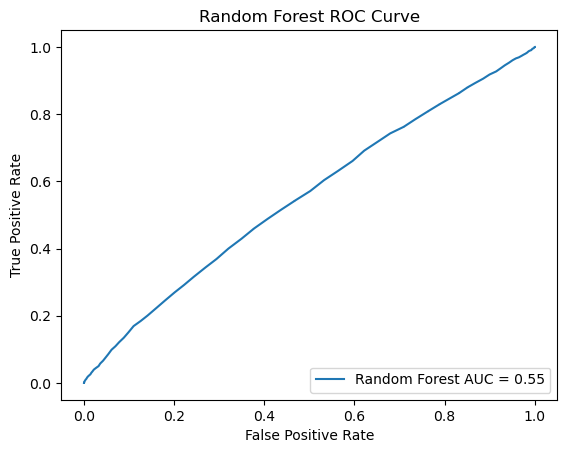

In [75]:
#AUC-ROC Curve: If this is a binary classification problem, calculate the ROC-AUC score and plot the ROC curve.
# Predict probabilities for ROC curve
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_rf, tpr_rf, label="Random Forest AUC = {:.2f}".format(roc_auc_score(y_test, y_prob_rf)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [76]:
#5. Feature Importance

#Random Forest can also provide feature importances directly, which can help interpret which features are most influential in the model’s decisions.
# Extract feature importances

feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance_rf)


                             Feature  Importance
2                     Monthly Income    0.498436
0                                Age    0.242542
3                   Years at Company    0.218841
1                             Gender    0.012073
8         Performance Rating_Average    0.004154
10           Performance Rating_High    0.004007
4              Job Satisfaction_High    0.003666
9   Performance Rating_Below Average    0.003508
7         Job Satisfaction_Very High    0.003397
6            Job Satisfaction_Medium    0.003387
11            Performance Rating_Low    0.003217
5               Job Satisfaction_Low    0.002770


In [77]:
#6. Hyperparameter Tuning
#This step can help you identify the best parameters for your data,

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)
print("Best Parameters:", grid_search_rf.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [78]:
# calculate the accuracy scores for both the training and testing data

from sklearn.metrics import accuracy_score

# Calculate accuracy on the training data
y_train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Training Accuracy:", train_accuracy_rf)

# Calculate accuracy on the testing data
y_test_pred_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Testing Accuracy:", test_accuracy_rf)


Training Accuracy: 0.9998322067213193
Testing Accuracy: 0.540268456375839


In [79]:
#Conclusion
import pandas as pd

# Data for the models and their accuracy
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors (KNN)', 'Naive Bayes', 'Random Forest'],
    'Accuracy (%)': [
        0.564317673378076 * 100,
        0.5164988814317674 * 100,
        0.5501118568232662 * 100,
        0.566834451901566 * 100,
        0.540268456375839 * 100
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as a table in Jupyter Notebook
df


,Model,Accuracy (%)
0,Logistic Regression,56.431767
1,Decision Tree,51.649888
2,K-Nearest Neighbors (KNN),55.011186
3,Naive Bayes,56.683445
4,Random Forest,54.026846


# conclusion 

Among the models tested, Naive Bayes has the highest accuracy at 56.68%, closely followed by Logistic Regression at 56.43%. Both of these models perform similarly and are the best performers in this case.

On the other hand, Decision Tree and Random Forest show lower accuracies, with Decision Tree being the least effective at 51.65%.


Best Model:

Naive Bayes and Logistic Regression are the best performing models here, with Naive Bayes slightly outperforming Logistic Regression.